# Problem 2: *Round-Off Error and Accurate Calculation of the Exponential Series*

Consider the series expansion for an exponential function: $$e^x \approx S_n(x) = 1 + \frac{x}{1!} + \frac{x^2}{2!} + ... + \frac{x^n}{n!}.$$

<div style="border: 1px solid white; max-width: 97%; padding: 8px">

#### Part A

Write a program that computes the exponential function using this series expansion for given
number of terms $n$.

</div>

In [1]:
# HELPER FUNCTIONS

# Dictionary that assists in code optimization
factorials = {}

def factorial(n: int) -> int:
    """
    Computes the factorial of the input number `n`.

    Parameters
    ----------
    n : int
        Starting number of the factorial.

    Returns
    -------
    int
        Factorial of `n`.
    """
    
    if n in factorials:
        return factorials[n]
    
    if n > 0:
        factorials[n] = n * factorial(n-1)
        return factorials[n]
    
    return 1

In [2]:
# SOLUTION

def exp_series(x: float, n: int) -> float:
    """
    Computes the exponential function using the series expansion of for the
    exponential function for a given number of terms `n`.

    Parameters
    ----------
    x : float
        Exponent value where the function is evaluated.
    n : int
        Number of terms.

    Returns
    -------
    float
        Result of the computation.
        
    """

    assert n >= 0, "Number of terms `n` must be >= 0."
    
    result = 1
    for i in range(1, n+1):
        result += x**i / factorial(i)
        
    return result

In [3]:
# RESULTS

x = 2
n = 5

solution_partA = exp_series(x, n)
print(f"x = {x}, n = {n}, solution = {solution_partA}")

x = 2, n = 5, solution = 7.266666666666667


<div style="border: 1px solid white; max-width: 97%; padding: 8px">

#### Part B

For $n$ ranging between 0 and 100, compare the result with the exponent calculated with a built-in function or function form a numerical library (e.g., `numpy.exp`) in the following way. Plot the error defined by $$\epsilon_n = \frac{|e^x - S_n(x)|}{e^x}$$ on a log-log plot for a large positive and large negative exponent (e.g., $x = 20$ and $x = −20$). Describe what you see.

</div>

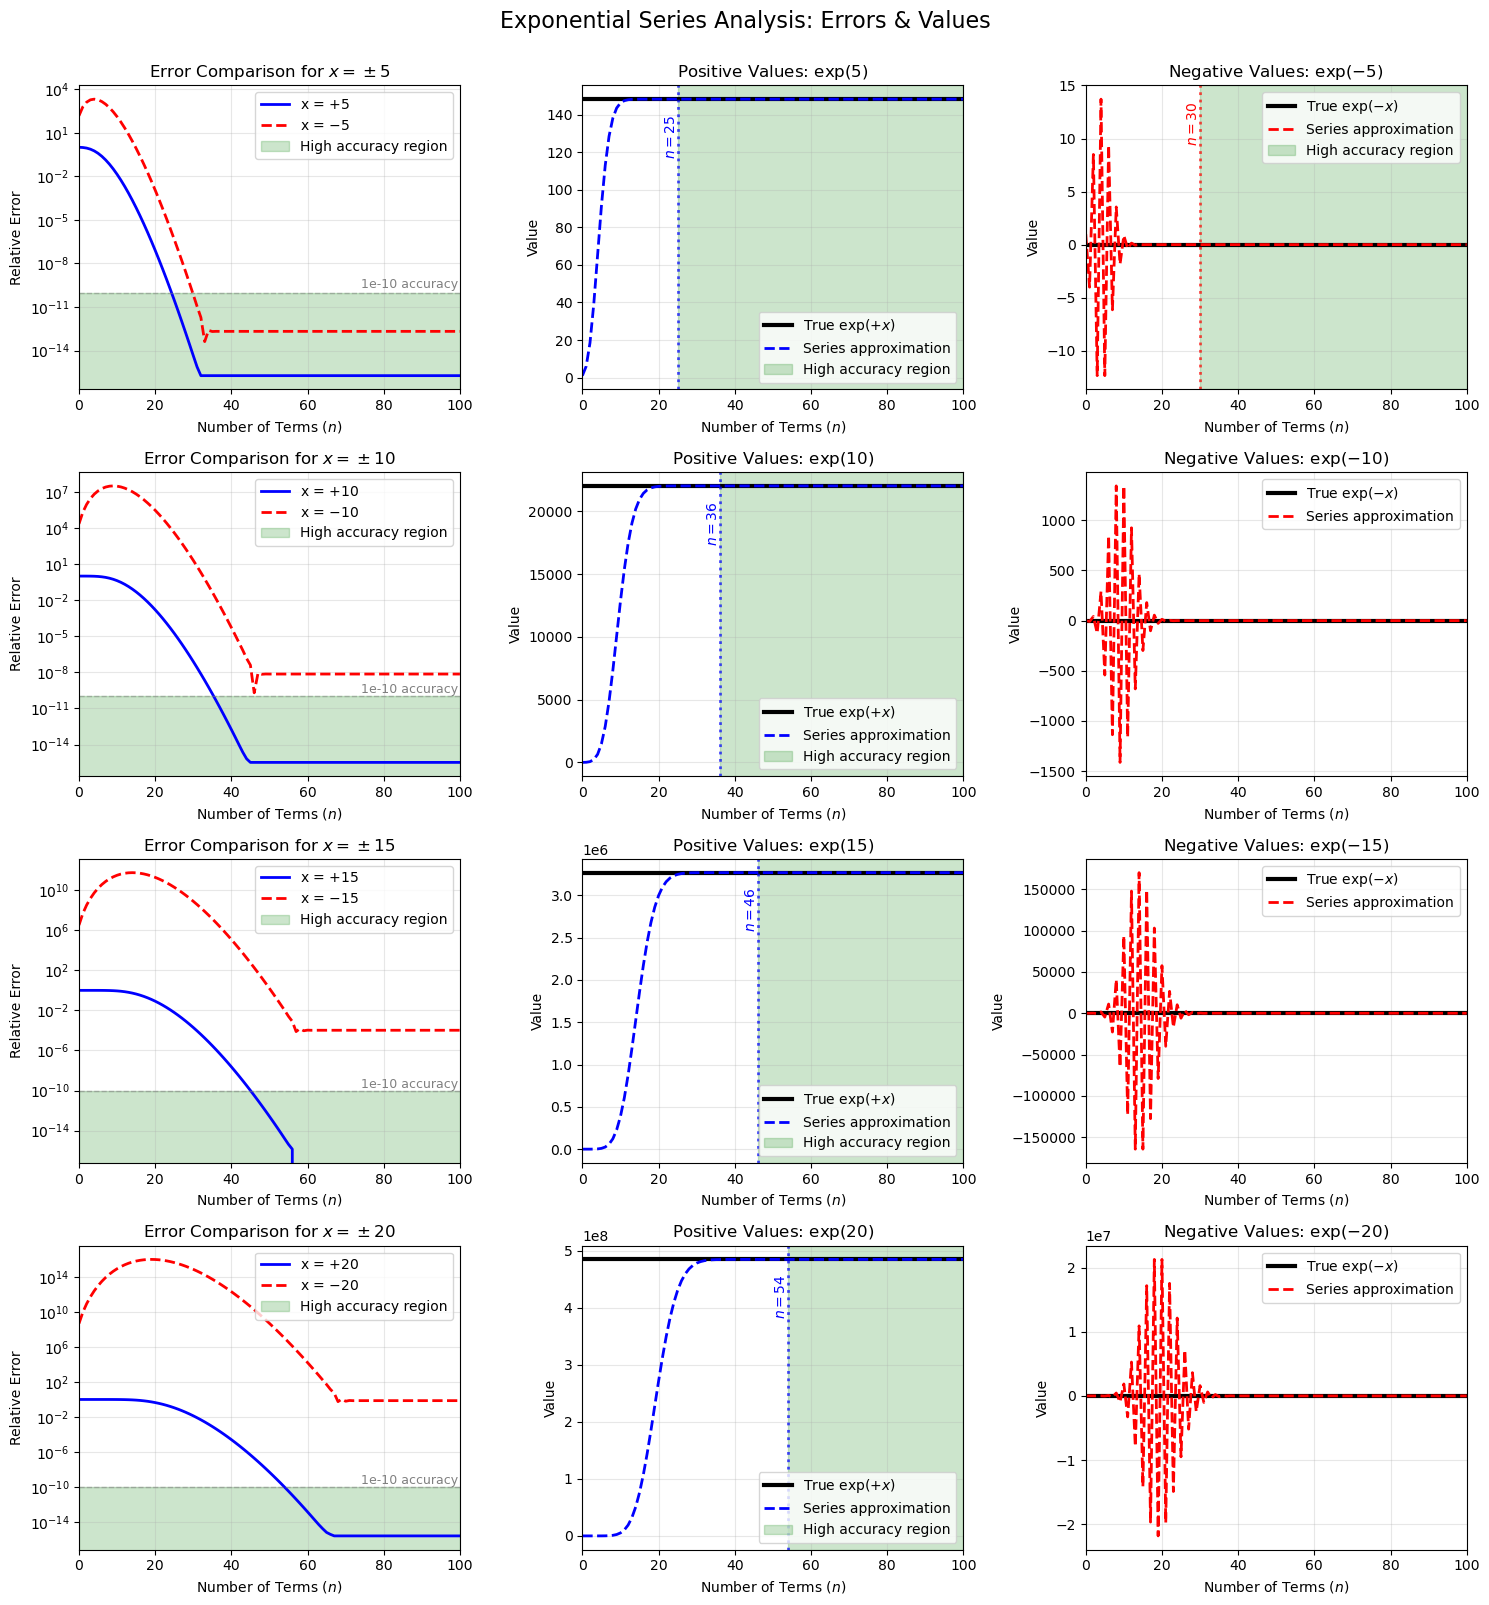

In [4]:
# TEST

import numpy as np
import matplotlib.pyplot as plt


# ------------------------------------------------------------------------------
# SET UP
# ------------------------------------------------------------------------------

xs = [5, 10, 15, 20]

n_max = 100
ns = np.arange(0, n_max+1)

tolerance = 1e-10


# ------------------------------------------------------------------------------
# FIGURES
# ------------------------------------------------------------------------------

fig, axs = plt.subplots(len(xs), 3, figsize=(15, 4*len(xs)))
title = "Exponential Series Analysis: Errors & Values"
fig.suptitle(title, fontsize=16, y=1)


# For each value x
for i, x in enumerate(xs):

    # Store true values
    positive_true = []
    negative_true = []
    
    # Store simulated values
    positive_simulated = []
    negative_simulated = []
    
    # Store errors
    positive_errors = []
    negative_errors = []
    
    # Check if tolerance has been reached
    tolerance_reached_positive = None
    tolerance_reached_negative = None
    
    # For each additional term n
    for n in ns:
        
        pos_true = np.exp( x)
        neg_true = np.exp(-x)
        
        pos_simulated = exp_series( x, n)
        neg_simulated = exp_series(-x, n)
        
        pos_error = np.abs((pos_true - pos_simulated)/pos_true)
        neg_error = np.abs((neg_true - neg_simulated)/neg_true)
        
        
        positive_true.append(pos_true)
        negative_true.append(neg_true)
        
        positive_simulated.append(pos_simulated)
        negative_simulated.append(neg_simulated)
        
        positive_errors.append(pos_error)
        negative_errors.append(neg_error)
        
    
        # Check if tolerance is reached
        if tolerance_reached_positive is None and pos_error < tolerance:
            tolerance_reached_positive = n
        if tolerance_reached_negative is None and neg_error < tolerance:
            tolerance_reached_negative = n
        
    
    # --------------------------------------------------------------------------
    # LEFT PANEL: Error (log-log)
    # --------------------------------------------------------------------------
    
    axs[i, 0].semilogy(ns, positive_errors,
                       'b-', label=f'x = $+{x}$', linewidth=2)
    axs[i, 0].semilogy(ns, negative_errors,
                       'r--', label=f'x = $-{x}$', linewidth=2)
    
    # Plot tolerance
    axs[i, 0].axhspan(0, tolerance, alpha=0.2,
                      color='green', label='High accuracy region')
    axs[i, 0].axhline(y=tolerance,
                      color='gray', linestyle='--', alpha=0.5, linewidth=1)
    axs[i, 0].text(74, tolerance*2,
                   f'{tolerance} accuracy', color='gray', fontsize=9)
    
    axs[i, 0].set_xlabel('Number of Terms ($n$)')
    axs[i, 0].set_ylabel('Relative Error')
    axs[i, 0].set_title(f'Error Comparison for $x = \\pm{x}$')
    axs[i, 0].legend()
    axs[i, 0].grid(True, alpha=0.3)
    axs[i, 0].set_xlim(0, n_max)
    
    
    # --------------------------------------------------------------------------
    # LEFT PANEL: Positive values
    # --------------------------------------------------------------------------
    
    axs[i, 1].plot(ns, positive_true,
                   'k-', label='True exp($+x$)', linewidth=3)
    axs[i, 1].plot(ns, positive_simulated,
                   'b--', label='Series approximation', linewidth=2)
    
    # Plot tolerance
    if tolerance_reached_positive is not None:
        axs[i, 1].axvspan(tolerance_reached_positive, n_max, alpha=0.2, 
                          color='green', label='High accuracy region')
        axs[i, 1].axvline(x=tolerance_reached_positive, alpha=0.7,
                          color='blue', linestyle=':', linewidth=2)
        axs[i, 1].text(tolerance_reached_positive, axs[i, 1].get_ylim()[1]*0.9, 
                       f'$n = {tolerance_reached_positive}$', rotation=90, 
                       color='blue', fontsize=10, ha='right', va='top')
    
    axs[i, 1].set_xlabel('Number of Terms ($n$)')
    axs[i, 1].set_ylabel('Value')
    axs[i, 1].set_title(f'Positive Values: exp(${x}$)')
    axs[i, 1].legend()
    axs[i, 1].grid(True, alpha=0.3)
    axs[i, 1].set_xlim(0, n_max)
    
    
    # --------------------------------------------------------------------------
    # RIGHT PANEL: Negative values
    # --------------------------------------------------------------------------
    
    axs[i, 2].plot(ns, negative_true,
                   'k-', label='True exp($-x$)', linewidth=3)
    axs[i, 2].plot(ns, negative_simulated,
                   'r--', label='Series approximation', linewidth=2)
    
    # Plot tolerance
    if tolerance_reached_negative is not None:
        axs[i, 2].axvspan(tolerance_reached_negative, n_max, alpha=0.2, 
                          color='green', label='High accuracy region')
        axs[i, 2].axvline(x=tolerance_reached_negative, alpha=0.7,
                          color='red', linestyle=':', linewidth=2)
        axs[i, 2].text(tolerance_reached_negative, axs[i, 2].get_ylim()[1]*0.9, 
                       f'$n = {tolerance_reached_negative}$', rotation=90, 
                       color='red', fontsize=10, ha='right', va='top')
        
    axs[i, 2].set_xlabel('Number of Terms ($n$)')
    axs[i, 2].set_ylabel('Value')
    axs[i, 2].set_title(f'Negative Values: exp($-{x}$)')
    axs[i, 2].legend()
    axs[i, 2].grid(True, alpha=0.3)
    axs[i, 2].set_xlim(0, n_max)
    
plt.tight_layout()
plt.show()

The middle plots for each row show the graph approaching the true $e^x$ from below. The rise of the graph is smooth with each extra term adding a positive contribution. When we cross the $n$-line depicted (vertical dotted line), the series approximation lies within $10^{-10}$ of the true value, and further terms only move us by smaller and smaller amounts until floating‐point limits flatten out the curve.

The right plots for each row show the alternating nature of our series. At the start, the graph swings above and below the true value of $e^{-x}$, and it only settles into the $10^{-10}$ window after a number of terms for the first graph (because $x$ is small). For the next three graphs, we never see the graph settling under the threshold because the denominator assumes such a small value that it can't keep up with machine precision.

The left plots are the relative error for both signs of $x$.
- For positive $x$, dividing by the large $e^x$ makes any mistakes our function makes appear tiny.
- For negative $x$, dividing by a tiny $e^{-x}$ does the opposite, enhancing each mistake. The small denominator makes the error at the start appear big because of this enhancement, and gradually the error descends as the alternating series cancels itself out.

<div style="border: 1px solid white; max-width: 97%; padding: 8px">

#### Part C

Consider the following (trivial) equality: $e^{-x} = (e^{-1})^x$. Write a program that utilizes this equality to get a more accurate series expansion for large negative exponents. Plot $\epsilon_n$ on a log-log plot to demonstrate that you have achieved this.

</div>

For $e^{-x} = (e^{-1})^x$ where $x >= 0$, we call
$$
e^{-1} = \sum_{i=0}^\infty \frac{(-1)^i}{i!} \approx B_n \sum_{i=0}^n \frac{(-1)^i}{i!}
$$

and so
$$
e^{-x} = (e^{-1})^x = (B_n)^x
$$

In [5]:
# SOLUTION

def exp_series_alt(x: float, n: int) -> float:
    """
    Computes the exponential function using the series expansion of for the
    exponential function for a given number of terms `n`.

    Parameters
    ----------
    x : float
        Exponent value where the function is evaluated.
    n : int
        Number of terms.

    Returns
    -------
    float
        Result of the computation.
        
    """

    assert n >= 0, "Number of terms `n` must be >= 0."
    
    
    result = 1
    
    # Positives
    if x >= 0:
        for i in range(1, n+1):
            result += x**i / factorial(i)
        return result
    
    # Negatives
    x_abs = -x
    for i in range(1, n+1):
        result += (-1)**i / factorial(i)
    return result**(x_abs)

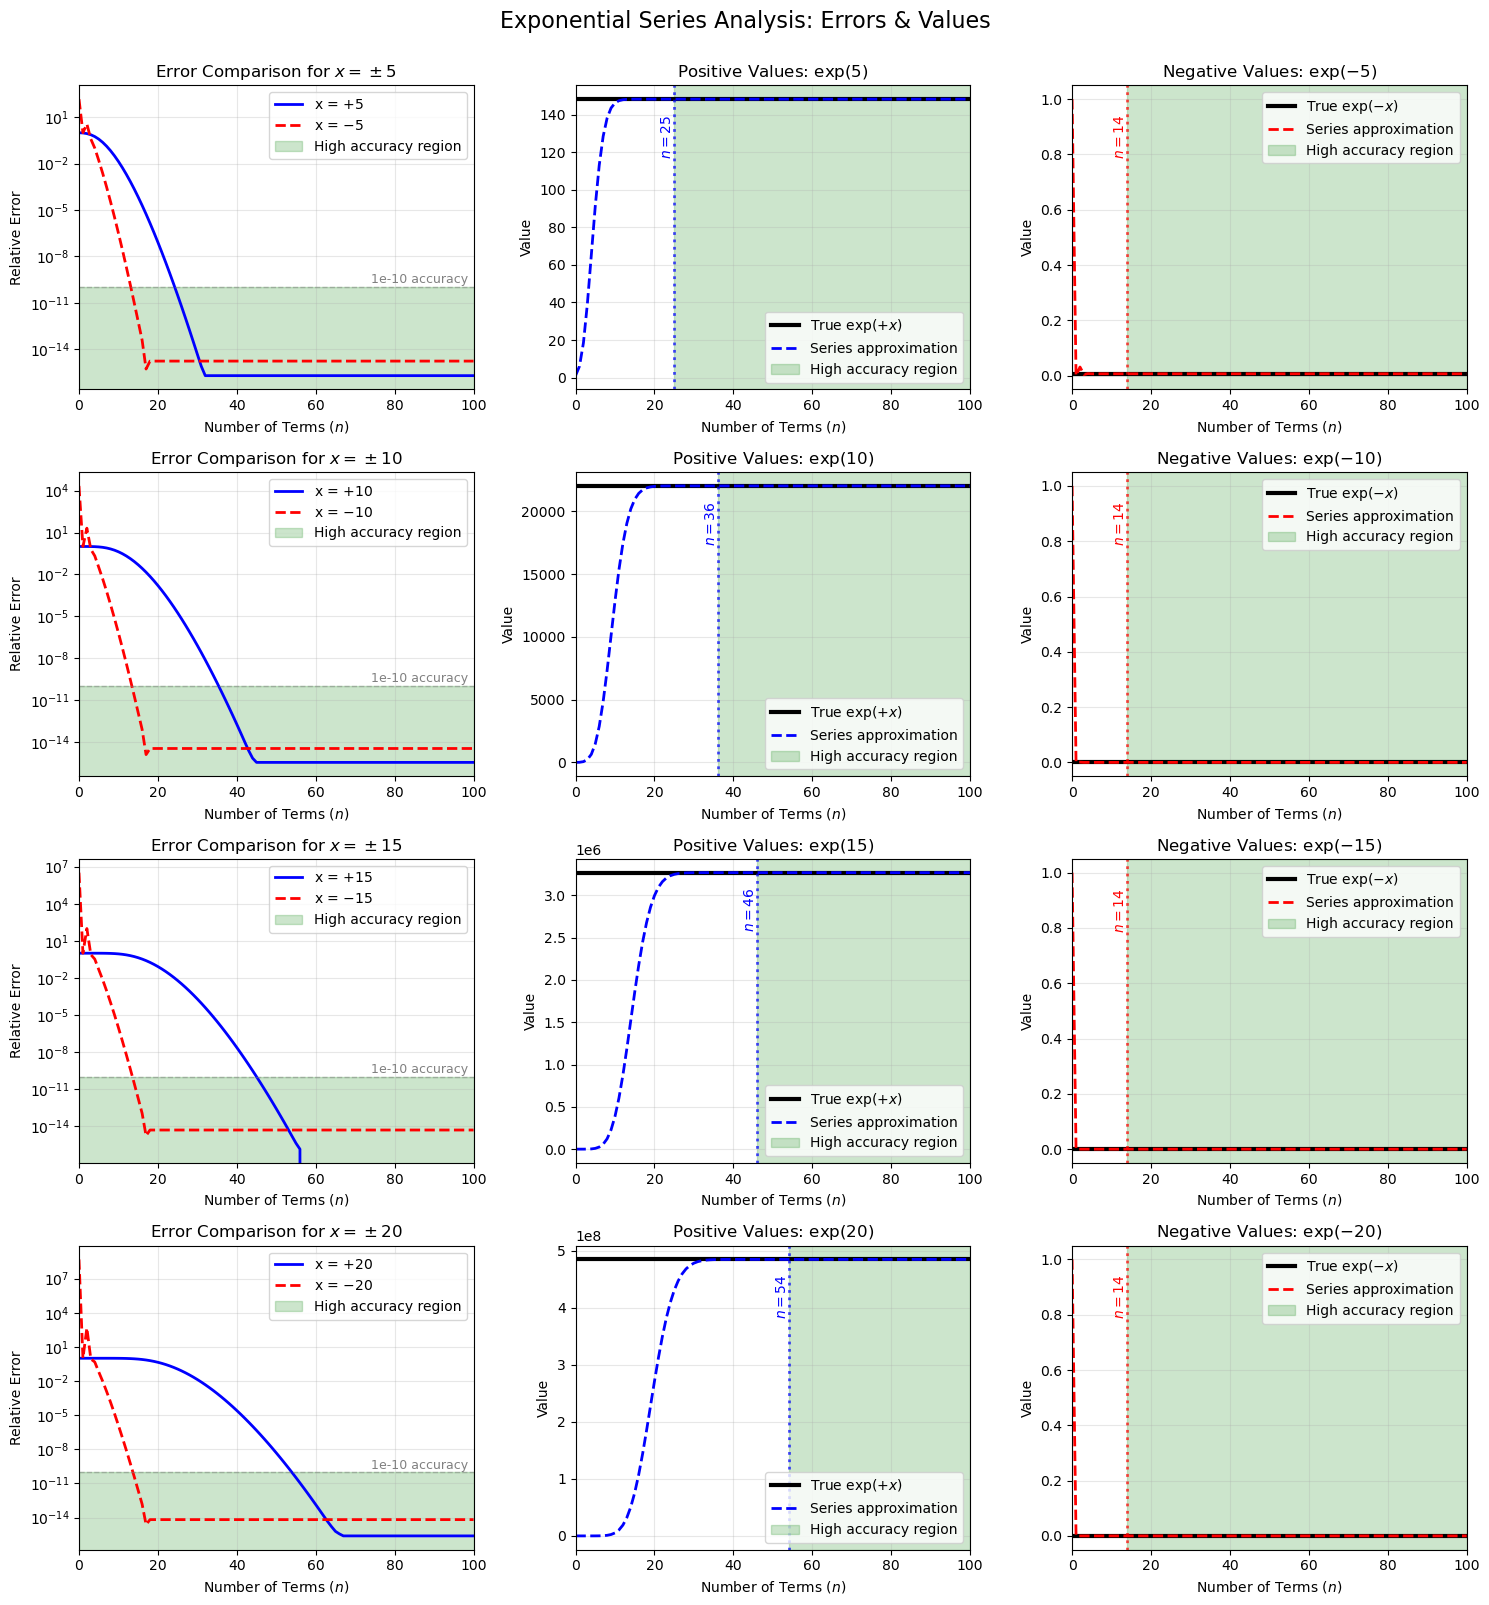

In [6]:
# TEST

import numpy as np
import matplotlib.pyplot as plt


# ------------------------------------------------------------------------------
# SET UP
# ------------------------------------------------------------------------------

xs = [5, 10, 15, 20]

n_max = 100
ns = np.arange(0, n_max+1)

tolerance = 1e-10


# ------------------------------------------------------------------------------
# FIGURES
# ------------------------------------------------------------------------------

fig, axs = plt.subplots(len(xs), 3, figsize=(15, 4*len(xs)))
title = "Exponential Series Analysis: Errors & Values"
fig.suptitle(title, fontsize=16, y=1)


# For each value x
for i, x in enumerate(xs):

    # Store true values
    positive_true = []
    negative_true = []
    
    # Store simulated values
    positive_simulated = []
    negative_simulated = []
    
    # Store errors
    positive_errors = []
    negative_errors = []
    
    # Check if tolerance has been reached
    tolerance_reached_positive = None
    tolerance_reached_negative = None
    
    # For each additional term n
    for n in ns:
        
        pos_true = np.exp( x)
        neg_true = np.exp(-x)
        
        pos_simulated = exp_series_alt( x, n)
        neg_simulated = exp_series_alt(-x, n)
        
        pos_error = np.abs((pos_true - pos_simulated)/pos_true)
        neg_error = np.abs((neg_true - neg_simulated)/neg_true)
        
        
        positive_true.append(pos_true)
        negative_true.append(neg_true)
        
        positive_simulated.append(pos_simulated)
        negative_simulated.append(neg_simulated)
        
        positive_errors.append(pos_error)
        negative_errors.append(neg_error)
        
    
        # Check if tolerance is reached
        if tolerance_reached_positive is None and pos_error < tolerance:
            tolerance_reached_positive = n
        if tolerance_reached_negative is None and neg_error < tolerance:
            tolerance_reached_negative = n
        
    
    # --------------------------------------------------------------------------
    # LEFT PANEL: Error (log-log)
    # --------------------------------------------------------------------------
    
    axs[i, 0].semilogy(ns, positive_errors,
                       'b-', label=f'x = $+{x}$', linewidth=2)
    axs[i, 0].semilogy(ns, negative_errors,
                       'r--', label=f'x = $-{x}$', linewidth=2)
    
    # Plot tolerance
    axs[i, 0].axhspan(0, tolerance, alpha=0.2,
                      color='green', label='High accuracy region')
    axs[i, 0].axhline(y=tolerance,
                      color='gray', linestyle='--', alpha=0.5, linewidth=1)
    axs[i, 0].text(74, tolerance*2,
                   f'{tolerance} accuracy', color='gray', fontsize=9)
    
    axs[i, 0].set_xlabel('Number of Terms ($n$)')
    axs[i, 0].set_ylabel('Relative Error')
    axs[i, 0].set_title(f'Error Comparison for $x = \\pm{x}$')
    axs[i, 0].legend()
    axs[i, 0].grid(True, alpha=0.3)
    axs[i, 0].set_xlim(0, n_max)
    
    
    # --------------------------------------------------------------------------
    # LEFT PANEL: Positive values
    # --------------------------------------------------------------------------
    
    axs[i, 1].plot(ns, positive_true,
                   'k-', label='True exp($+x$)', linewidth=3)
    axs[i, 1].plot(ns, positive_simulated,
                   'b--', label='Series approximation', linewidth=2)
    
    # Plot tolerance
    if tolerance_reached_positive is not None:
        axs[i, 1].axvspan(tolerance_reached_positive, n_max, alpha=0.2, 
                          color='green', label='High accuracy region')
        axs[i, 1].axvline(x=tolerance_reached_positive, alpha=0.7,
                          color='blue', linestyle=':', linewidth=2)
        axs[i, 1].text(tolerance_reached_positive, axs[i, 1].get_ylim()[1]*0.9, 
                       f'$n = {tolerance_reached_positive}$', rotation=90, 
                       color='blue', fontsize=10, ha='right', va='top')
    
    axs[i, 1].set_xlabel('Number of Terms ($n$)')
    axs[i, 1].set_ylabel('Value')
    axs[i, 1].set_title(f'Positive Values: exp(${x}$)')
    axs[i, 1].legend()
    axs[i, 1].grid(True, alpha=0.3)
    axs[i, 1].set_xlim(0, n_max)
    
    
    # --------------------------------------------------------------------------
    # RIGHT PANEL: Negative values
    # --------------------------------------------------------------------------
    
    axs[i, 2].plot(ns, negative_true,
                   'k-', label='True exp($-x$)', linewidth=3)
    axs[i, 2].plot(ns, negative_simulated,
                   'r--', label='Series approximation', linewidth=2)
    
    # Plot tolerance
    if tolerance_reached_negative is not None:
        axs[i, 2].axvspan(tolerance_reached_negative, n_max, alpha=0.2, 
                          color='green', label='High accuracy region')
        axs[i, 2].axvline(x=tolerance_reached_negative, alpha=0.7,
                          color='red', linestyle=':', linewidth=2)
        axs[i, 2].text(tolerance_reached_negative, axs[i, 2].get_ylim()[1]*0.9, 
                       f'$n = {tolerance_reached_negative}$', rotation=90, 
                       color='red', fontsize=10, ha='right', va='top')
        
    axs[i, 2].set_xlabel('Number of Terms ($n$)')
    axs[i, 2].set_ylabel('Value')
    axs[i, 2].set_title(f'Negative Values: exp($-{x}$)')
    axs[i, 2].legend()
    axs[i, 2].grid(True, alpha=0.3)
    axs[i, 2].set_xlim(0, n_max)
    
plt.tight_layout()
plt.show()

Note how the error is much better than it was on the previous plot.